In [1]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img_gray = cv2.imread("/Users/ymguo/CVsummer/lena.jpg", 0)
cv2.imshow('lena', img_gray)


key = cv2.waitKey()
if key == 27:    
    cv2.destroyAllWindows()

In [3]:
print(img_gray)   #print grey image's image matrix

[[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]


上面是一个2D矩阵，每一个是一个整型数组即 [0,255] ，uint或int8，u指无符号，8指该int型占8位。

In [4]:
print(img_gray.dtype)  # to show image data type

uint8


In [5]:
print(img_gray.shape)  # to show gray image shape : h, w

(512, 512)


In [6]:
img = cv2.imread("/Users/ymguo/CVsummer/lena.jpg")
cv2.imshow('lena', img)      #打印原图

key = cv2.waitKey()
if key == 27:    
    cv2.destroyAllWindows()

In [7]:
print(img)       # to show color image
print(img.shape)        # show channels : h, w, c

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]
(512, 512, 3)


In [8]:
# image crop
img_crop = img[0:150, 0:250]
cv2.imshow('img_crop', img_crop)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [9]:
B, G, R = cv2.split(img)   #每一个通道都是灰度图
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)     # 红色分量通道最明亮 即矩阵数值最大

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [10]:
# change color

def random_light_color(img):
    # brightness
    B, G, R = cv2.split(img)

    b_rand = random.randint(-50, 50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] = 255         # 防止超过255 越界
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0            # 防止小于0 越界
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)

    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)

    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)

    img_merge = cv2.merge((B, G, R))     # 融合
    #img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)  ?
    return img_merge

img_random_color = random_light_color(img)
cv2.imshow('img_random_color', img_random_color)
cv2.imshow('lena', img)      #打印原图
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [11]:
# gamma correction

img_dark = cv2.imread("/Users/ymguo/CVsummer/dark.jpg")
cv2.imshow('img_dark', img_dark)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    
def adjust_gamma(image, gamma):
    #image = img_dark
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)       #原理：把线性关系 变成 曲线关系
    table = np.array(table).astype("uint8")
    return cv2.LUT(image, table)             # LUT函数 作映射关系: 像素灰度值的映射


img_brighter = adjust_gamma(img_dark, 2.0)

cv2.imshow('img_brighter', img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [12]:
#测试 table

#invGamma = 1.0/2.0
#table = []
#for i in range(256):
#    table.append(((i / 255.0) ** invGamma) * 255)       #原理：把线性关系 变成 曲线关系

#table = np.array(table).astype("uint8")
#print(table)


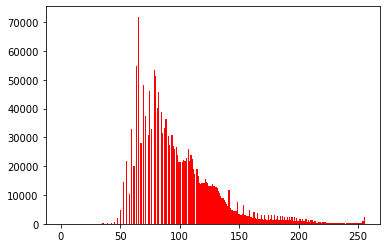

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [13]:
# histogram统计上的概念：比如图片512*512，则有262144个pixel，可以算值域为0的有几个pixel。

#print(img_brighter.shape)
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
#plt.show()

img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel   平均化（之前图片偏暗 则 直方图集中在低值区域）
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   # only for 1 channel
#print(img_yuv.shape)

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)   # y: luminance(明亮度), u&v: 色度饱和度
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey()
if key == 27:
    exit()

In [4]:
##############################
img = cv2.imread("/Users/ymguo/CVsummer/lena.jpg")
# rotation 旋转

M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 45, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))    #warpAffine函数：把旋转矩阵作用到图形上

cv2.imshow('rotated lena', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [5]:
print(M)

[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]


In [8]:
M[0][2] = M[1][2] = 0
print(M)

[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]]


In [9]:
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lena2', img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
# explain translation

In [10]:
# scale放大放小 + rotation + translation平移 = similarity transform   （平行还是平行 直角还是直角）

M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lena3', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[  0.4330127    0.25        81.14874832]
 [ -0.25         0.4330127  209.14874832]]


In [16]:
##############################
import numpy as np
# Affine Transform  （仿射变换）  （平行仍旧 但直角不是 感觉图片被挤了一下）
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
print(pts1)
print(pts2)

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('affine lena', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()


[[  0.   0.]
 [511.   0.]
 [  0. 511.]]
[[102.4  51.2]
 [460.8 102.4]
 [ 51.2 460.8]]


In [19]:
############################
# perspective transform  （透视变换）    (平行不再平行 直角不再直角)

import random

def random_warp(img, row, col):
    height, width, channels = img.shape
    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp

M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenna_warp', img_warp)

key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

